### 1. Sección Teoría

### 1.1 ¿Para qué sirve ecualizar el histograma de una imagen?<br>

Ecualizar el histograma de una imagen sirve para mejorar su contraste, haciendo que los detalled en areas oscuras o claras sean mas visibles, en el proceso se redistribuye los niveles de intensidad de los pixeles aprovechando mejor el rango completo de valores (0-255 en imagenes en escala de grises) . generalmente revela o mejora la visibilidad de detalles que estaban ocultos por problemas en la adquisicion como mala iluminacion.

### 1.2 ¿Cuál es la diferencia entre el histograma original y el ecualizado?<br>
La diferencia entre el histograma original y el ecualizado radica principalmente en cómo se distribuyen los niveles de intensidad de la imagen. 

Ej.: 
la imagen original puede tener un histograma con picos en ciertas regiones (entre 0 y 100), lo que indicaria que la imagen tiene poca variedad de tonos y bajo contraste.

al ecualizarlo se busca que todos los niveles de intensidad tengan una frecuencia más uniforme. El histograma resultante es mas plano y extndido.

### 1.3 ¿Por qué no se debe ecualizar imágenes a color en los canales R, G y B por separado?<br>

Por que la ecualizacion separada provoca que se pierda la relacion original entre estos canales alterando el color percibido, distorsionando el contraste y haciendola lucir artificial.

### 1.4 Menciona dos espacios de color alternativos que permiten ecualizar luminancia sin afectar el color.<br>

* YCbCr (YUV)
    Y: luminancia (brillo)
    Cb y Cr: componentes de color (crominancia)
    con este espacio se puede ecualizar solo el canal Y para mejorar el contraste sin alterar los componentes de color.

* HSV (Hue, Saturation, Value)
    H: matiz (color)
    S: saturación (intensidad del color)
    V: valor (brillo)
    en este espacio se puede utilizar V para mejorar el brillo o contraste sin modificar el color (H) ni la saturación (S).

#### 2. Sección Programación
2.1 Dada la siguiente imagen (en escala de grises) y su histograma ¿Esperas que la ecualización tenga mucho o poco efecto en esta imagen? Justifica. ¿Qué tipo de imagen se beneficia más de la ecualización?







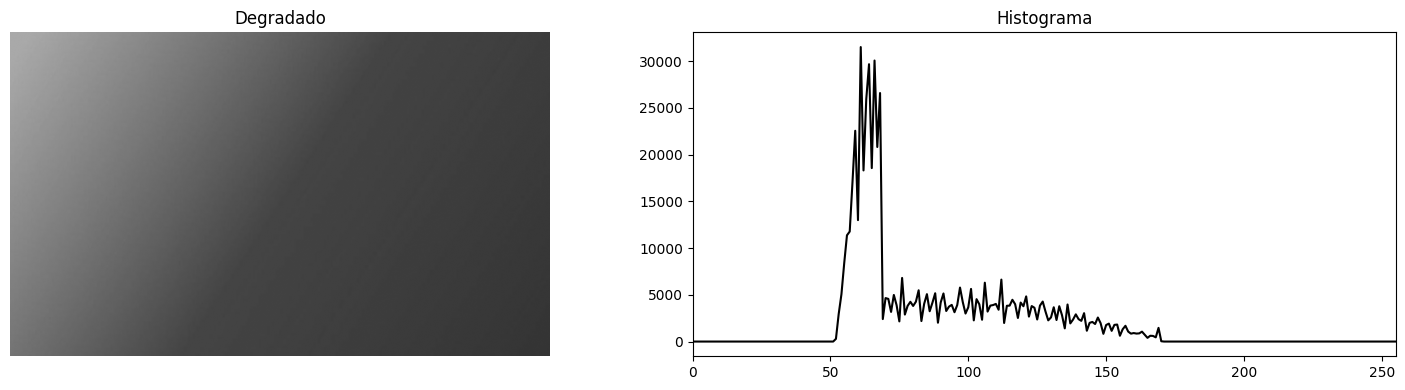

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 

def mostrar(img, titulo):
    hist = np.histogram(img, bins=256, range=(0, 255))[0]
    fig, axs = plt.subplots(1, 2, figsize=(15, 4))

    axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axs[0].set_title(titulo)
    axs[0].axis('off')

    axs[1].plot(hist, color='black')
    axs[1].set_title("Histograma")
    axs[1].set_xlim(0, 255)

    plt.tight_layout()
    plt.show()

img1 = np.array(Image.open('./cl_1.jpg').convert('L'))
mostrar(img1, "Degradado")

Se esperaria que tenga poco efecto ya que el histograma muestra una distribucion de intenciadaes en un rango estrecho lo que indica un contraste moderado o bajo , sin aprovechar todo el rengo dinamico disponible , siendo un degradado de transiciones suaves la ecualizacion puede romper la uniformidad y generar saltos artificiales de luminancia mas que mejorarla.

Las imagenes que se mejoran mas de una ecualizacion son aquellas que estan sobre o subexpuestas, haciendo que la informacion de los pixeles este en el rango alto cercano a los blancos (255) o en el rango bajo cercano a 0 , ademas de las imagenes con un contraste plano como las radiografias.

##### 2.2 Usando la imagen suministrada (cl_2). Realiza lo siguiente:

2.2.1 Muestra la imagen original en escala de grises y su histograma.

2.2.2 Aplica ecualización de histograma en escala de grises.

2.2.3 Muestra la imagen ecualizada y su nuevo histograma.

2.2.4 Compara visualmente los resultados: ¿qué mejoró? ¿qué no?

2.2.5 Implementa la ecualización de histograma en la imagen a color (sobre el canal Y usando YCbCr o sobre el canal V usando HSV).

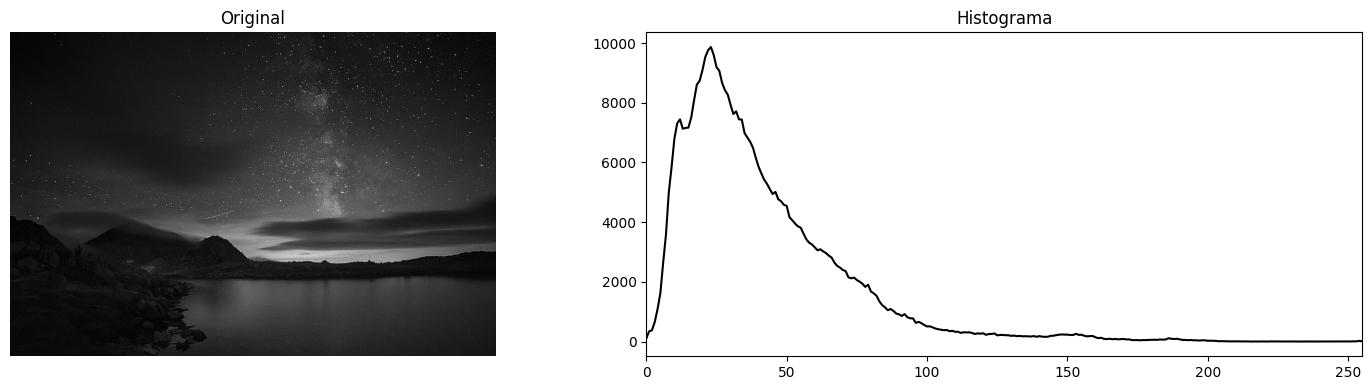

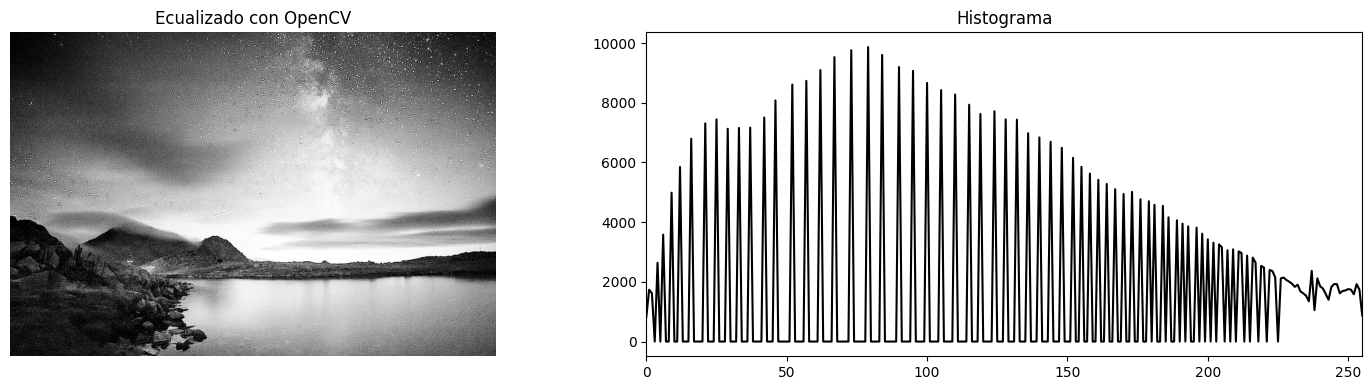

In [18]:
import cv2

img2 = Image.open('./cl_2.jpg').convert('L')

mostrar(np.array(img2), "Original")

img2_np = np.array(img2)

img_eq = cv2.equalizeHist(img2_np)

mostrar(img_eq, "Ecualizado con OpenCV")



	
en la imagen ecualizada se revelan detalles que antes estaban en sombras, especialmente en las áreas de las montañas y las nubes.
El cielo resalta mas las estrellas.

hay un histograma mas distribuido el histograma original estaba sesgado hacia los valores bajos (imagen oscura), el histograma ecualizado se extiende por todo el rango (0–255), lo que indica una mejor utilización del rango dinámico.

La ecualización también amplifica el ruido presente en áreas oscuras, algunas regiones pueden parecer sobresaturadas en contraste, haciendo que ciertos bordes o texturas se vean artificiales.

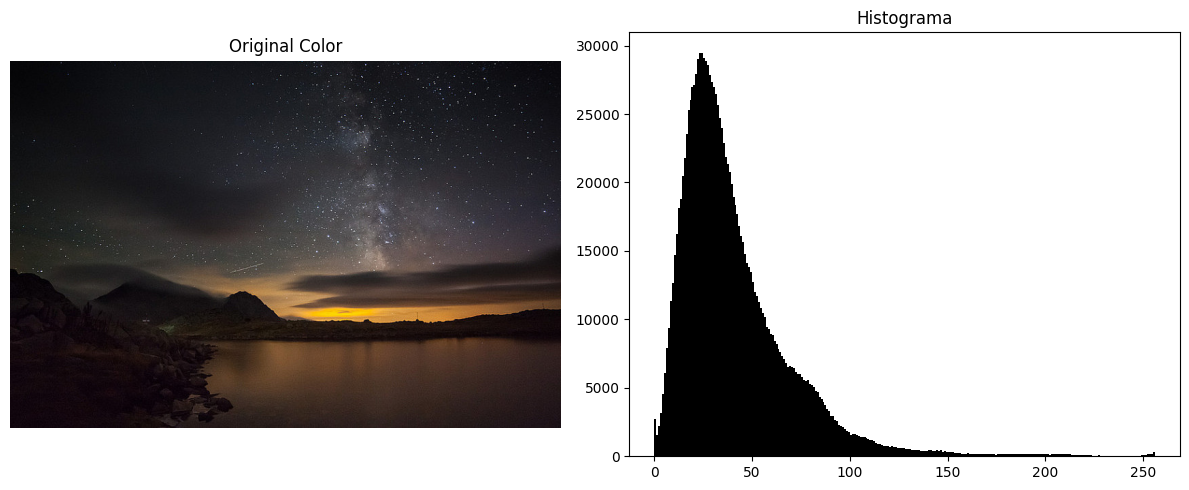

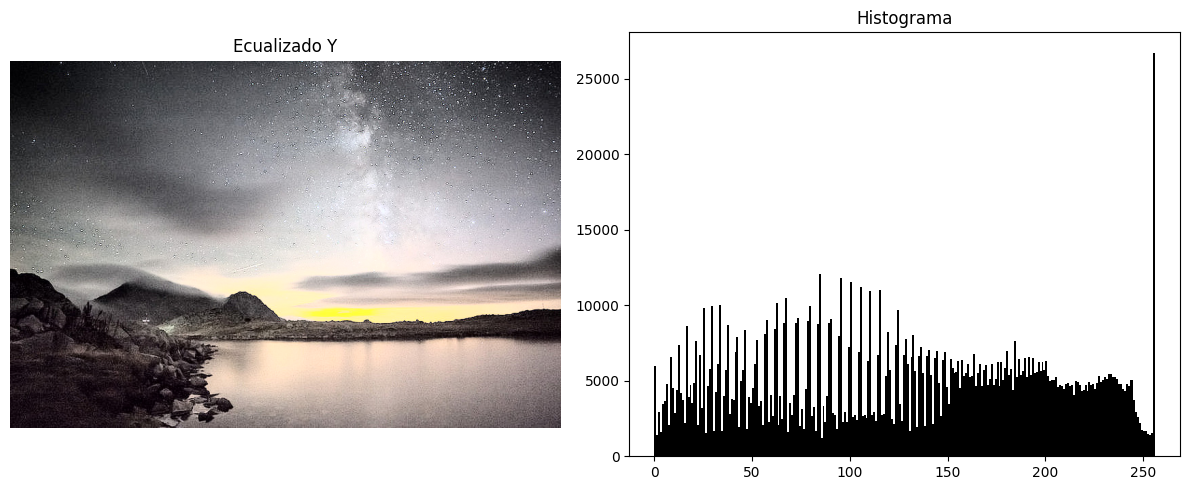

In [29]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

def mostrar_color(img, title=""):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.hist(img.ravel(), bins=256, range=(0, 256), color='black')
    plt.title("Histograma")
    plt.tight_layout()
    plt.show()

img2 = Image.open('./cl_2.jpg')
mostrar_color(np.array(img2), "Original Color")

img2_np = np.array(img2)
img2_bgr = cv2.cvtColor(img2_np, cv2.COLOR_RGB2BGR)
img_ycrcb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2YCrCb)

y, cr, cb = cv2.split(img_ycrcb)

y_eq = cv2.equalizeHist(y)

img_ycrcb_eq = cv2.merge((y_eq, cr, cb))
img_eq_bgr = cv2.cvtColor(img_ycrcb_eq, cv2.COLOR_YCrCb2BGR)
img_eq_rgb = cv2.cvtColor(img_eq_bgr, cv2.COLOR_BGR2RGB)

mostrar_color(img_eq_rgb, "Ecualizado Y")